In [1]:
# Reading values that my program found and collecting basic statistics

import pandas as pd

df = pd.read_csv(".\\results_first_run_interval_100.csv")

# calculate the total execution time
total_execution_time_sec = round(df['Execution time'].sum(), 2)
minutes = total_execution_time_sec // 60
hours = minutes // 60

print("All STC test were calculated in: {} seconds, {} minutes, hours {}".format(total_execution_time_sec, minutes, hours))

# extract the test name and rename columns
df['Test name'] = df['Test name'].apply(lambda x: x.split('/')[-1])
df = df.rename(columns={'Execution time': 'Execution time Leonid'})
df = df.rename(columns={'Result': 'Result Leonid'})

df

All STC test were calculated in: 709.79 seconds, 11.0 minutes, hours 0.0


,Test name,Execution time Leonid,Result Leonid,Values
0,STC_0001.smt2,0.003764,SAT,x = -100 y = 1 z = 100
1,STC_0002.smt2,0.323468,SAT,x = -47 y = -24 z = 49
2,STC_0003.smt2,0.573846,SAT,x = -5 y = 4 z = 4
3,STC_0004.smt2,1.253370,Not SAT,NaN
4,STC_0005.smt2,1.565967,Not SAT,NaN
...,...,...,...,...
995,STC_0996.smt2,0.549865,SAT,x = -7 y = 2 z = 11
996,STC_0997.smt2,0.556982,SAT,x = -3 y = 8 z = 8
997,STC_0998.smt2,0.533815,SAT,x = -9 y = -1 z = 12
998,STC_0999.smt2,0.530791,SAT,x = -9 y = 0 z = 12


In [2]:
# Reading values from original cvc5 executable and collecting basic statistics
import pandas as pd

df_orig = pd.read_csv(".\\results_original_cvc5_timeout_1_min.csv")

# calculate the total execution time
total_execution_time_sec = round(df_orig['Execution time'].sum(), 2)
minutes = total_execution_time_sec // 60
hours = minutes // 60

print("All STC test were calculated in: {} seconds, {} minutes, hours {}".format(total_execution_time_sec, minutes, hours))
print("Inmortant note, that timeout was set to 1 minute!")

# extract the test name and rename columns
df_orig['Test name'] = df_orig['Test name'].apply(lambda x: x.split('/')[-1])
df_orig = df_orig.rename(columns={'Execution time': 'Execution time CVC5'})
df_orig = df_orig.rename(columns={'Result': 'Result CVC5'})


df_orig

All STC test were calculated in: 55544.7 seconds, 925.0 minutes, hours 15.0
Inmortant note, that timeout was set to 1 minute!


,Test name,Execution time CVC5,Result CVC5,Values
0,STC_0001.smt2,22.307753,sat,NaN
1,STC_0002.smt2,0.249582,sat,NaN
2,STC_0003.smt2,0.378245,sat,NaN
3,STC_0004.smt2,60.026129,NaN,NaN
4,STC_0005.smt2,60.028352,NaN,NaN
...,...,...,...,...
995,STC_0996.smt2,60.024707,NaN,NaN
996,STC_0997.smt2,60.023573,NaN,NaN
997,STC_0998.smt2,60.024111,NaN,NaN
998,STC_0999.smt2,60.030542,NaN,NaN


In [3]:
# Mmerging 2 datframes to compare and make analysis

resulting_df = pd.merge(df, df_orig, on='Test name')

# Droping values calculaed from CVC5, because they are not calculated
resulting_df = resulting_df.drop('Values_y', axis=1)

# Values calculated by my solver could be used later for verification
resulting_df = resulting_df.rename(columns={'Values_x': 'Values Leonid'})

# strip any leading or trailing whitespace from the "Result CVC5" column
resulting_df['Result Leonid'] = resulting_df['Result Leonid'].str.strip().str.lower()

# count the number of rows where the "Result Leonid" column and the "Result CVC5" column have the same value
same_results_counter = sum(resulting_df['Result Leonid'] == resulting_df['Result CVC5'])
print("In total there are {} cases when the programs gave the same results".format(same_results_counter))


# Define the lambda function to calculate missing values
calculate_missing = lambda col: col.isna().sum()
sat_counter = lambda col: sum(1 for val in col if val == 'sat')

# Apply the lambda function to column 'B'
missing_values_cvc = resulting_df['Result CVC5'].pipe(calculate_missing)



sat_count_Leonid = sat_counter(resulting_df['Result Leonid'])
sat_count_cvc = sat_counter(resulting_df['Result CVC5'])

print("Number of 'sat' values in column: Result Leonid: {}".format( sat_count_Leonid))
print("Number of 'sat' values in column: Result CVC5: {}".format(sat_count_cvc))

print("There are {} missing values in column Result CVC5.".format(missing_values_cvc))

resulting_df


In total there are 144 cases when the programs gave the same results
Number of 'sat' values in column: Result Leonid: 615
Number of 'sat' values in column: Result CVC5: 144
There are 856 missing values in column Result CVC5.


,Test name,Execution time Leonid,Result Leonid,Values Leonid,Execution time CVC5,Result CVC5
0,STC_0001.smt2,0.003764,sat,x = -100 y = 1 z = 100,22.307753,sat
1,STC_0002.smt2,0.323468,sat,x = -47 y = -24 z = 49,0.249582,sat
2,STC_0003.smt2,0.573846,sat,x = -5 y = 4 z = 4,0.378245,sat
3,STC_0004.smt2,1.253370,not sat,NaN,60.026129,NaN
4,STC_0005.smt2,1.565967,not sat,NaN,60.028352,NaN
...,...,...,...,...,...,...
995,STC_0996.smt2,0.549865,sat,x = -7 y = 2 z = 11,60.024707,NaN
996,STC_0997.smt2,0.556982,sat,x = -3 y = 8 z = 8,60.023573,NaN
997,STC_0998.smt2,0.533815,sat,x = -9 y = -1 z = 12,60.024111,NaN
998,STC_0999.smt2,0.530791,sat,x = -9 y = 0 z = 12,60.030542,NaN


## Report on Comparison of STC Test Results: My SMT Solver vs. Original CVC5 Solver

### Introduction:
I developed an SMT solver that solves constraints by testing values in the range from -100 to 100. I used this solver to run 1000 Math Problems STC tests and compared my results to those of the original CVC5 solver. In this report, I will discuss the results of this comparison.

### Comparison of Results:
Out of the 1000 tests, my program gave the same result as the original CVC5 solver in 144 cases. This suggests that my solver is performing reasonably well, given that it is based on a brute-force approach and tests values only in a limited interval. Also, important to note that if my solver didn't find the solution inside the interval it will return NOT SAT, meanwhile if cvc is not able to solve a constraint inside a 1-minute timeout it will return NaN

### Time Comparison:
The time it took for my solver to run all 1000 tests was 11 minutes, while the original CVC5 solver took 15 hours. However, I set a timeout of 1 minute for the original CVC5 solver, after which it terminated if a value was not found. This indicates that my solver is faster than the original CVC5 solver in finding values for the range tested.

### Conclusion:
In conclusion, the results of the comparison show that my SMT solver is performing well, given its brute-force approach and limited testing range. Additionally, my solver is faster than the original CVC5 solver in finding values within the range tested. However, it is important to note that further testing is required to evaluate the performance of my solver on more complex problems and larger testing ranges. 


In [29]:
"""
Supporting functions
"""


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns


# define a function to process the result for each test
def process_result(row):
    if row['Result CVC'] == 'sat':
        return 'Match' if row['Result my solver'] == 'sat' else 'Mismatch'
    elif row['Result CVC'] == 'unsat':
        return 'Match' if row['Result my solver'] == 'unsat' else 'Mismatch'
    else:
        return 'Mismatch'
    


def plot_execution_times(df):
    # Calculate average and median execution times for my solver and CVC
    my_solver_avg = df['Execution time my solver'].mean()
    cvc_avg = df['Execution time CVC'].mean()
    my_solver_median = df['Execution time my solver'].median()
    cvc_median = df['Execution time CVC'].median()

    # Plot the average execution times
    fig, ax = plt.subplots()
    ax.bar(['My Solver', 'CVC'], [my_solver_avg, cvc_avg])
    ax.set_ylabel('Average Execution Time (seconds)')
    ax.set_title('Average Execution Times of My Solver and CVC')

    # Plot the median execution times
    fig, ax = plt.subplots()
    ax.bar(['My Solver', 'CVC'], [my_solver_median, cvc_median])
    ax.set_ylabel('Median Execution Time (seconds)')
    ax.set_title('Median Execution Times of My Solver and CVC')

    return plt.show()





def stc_time_comparison(df, test_name):

    x_label = f"{test_name} test index"
    my_solver_times = df['Execution time my solver']
    cvc5_times = df['Execution time CVC']
    
    plt.plot(my_solver_times, '.', label='my solver', markersize=3, color='red')
    plt.plot(cvc5_times, '.', label='CVC5', markersize=3, color='blue')
    
    
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel('Execution time (seconds)')
    plt.title('Execution time comparison')
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))

    # Set x-axis ticks to be at every 100
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(100))
    
    plt.gca().legend(loc='upper right', fontsize='xx-small')
    
    plt.gcf().set_size_inches(10, 5)
    plt.tight_layout()
    
    return plt.show()



def sat_unsat(df, new_col_name=None ):

    if new_col_name is not None:
        my_solver_sat = df.loc[df['Result my approve_tests_my_solver'] == 'sat'].shape[0]
        my_solver_unsat = df.loc[df['Result my approve_tests_my_solver'] == 'not sat'].shape[0]

    else:
        my_solver_sat = df.loc[df['Result my solver'] == 'sat'].shape[0]
        my_solver_unsat = df.loc[df['Result my solver'] == 'unsat'].shape[0]


    cvc5_solver_sat = df.loc[df['Result CVC'] == 'sat'].shape[0]
    cvc5_solver_unsat = df.loc[df['Result CVC'] == 'unsat'].shape[0]
    cvc5_solver_timeout = df.loc[df['Result CVC'] == 'cvc5 interrupted by SIGTERM.'].shape[0]

    # Create a 3x2 table
    data = {'Solver': ['My Solver', 'cvc5'], 
            'sat': [my_solver_sat, cvc5_solver_sat],
            'unsat': [my_solver_unsat, cvc5_solver_unsat],
            'timeout': [0, cvc5_solver_timeout]}
    table = pd.DataFrame(data).set_index('Solver')

    # Create the heatmap
    plt.figure(figsize=(8, 4))
    cmap = sns.color_palette("RdBu_r", 10)
    sns.heatmap(table, cmap='Blues', annot=True, fmt="d", cbar=False)
    plt.title('SAT/UNSAT/Timeout Comparison')
    return plt.show()





In [2]:
# Reading values that my program found and collecting basic statistics

import pandas as pd

df = pd.read_csv(".\\results_second_run_interval_300.csv")

# calculate the total execution time
total_execution_time_sec = round(df[' Execution time'].sum(), 2)
minutes = total_execution_time_sec // 60
hours = minutes // 60

print("All STC test were calculated in: {} seconds, {} minutes, hours {}".format(total_execution_time_sec, minutes, hours))

# extract the test name and rename columns
df['Test name'] = df['Test name'].apply(lambda x: x.split('/')[-1])
df = df.rename(columns={' Execution time': 'Execution time Leonid'})
df = df.rename(columns={'Result': 'Result Leonid'})

df

All STC test were calculated in: 19581.2 seconds, 326.0 minutes, hours 5.0


,Test name,Execution time Leonid,Result,Values
0,STC_0001.smt2,0.030689,SAT,x = -300 y = 1 z = 300
1,STC_0002.smt2,7.177578,SAT,x = -161 y = -54 z = 163
2,STC_0003.smt2,15.041955,SAT,x = -5 y = 4 z = 4
3,STC_0004.smt2,31.527554,Not SAT,NaN
4,STC_0005.smt2,31.542761,Not SAT,NaN
...,...,...,...,...
995,STC_0996.smt2,18.222798,SAT,x = -7 y = 2 z = 11
996,STC_0997.smt2,8.747455,SAT,x = -153 y = 65 z = 149
997,STC_0998.smt2,16.570406,SAT,x = -9 y = -1 z = 12
998,STC_0999.smt2,7.658770,SAT,x = -168 y = 111 z = 150


In [3]:
# Reading values from original cvc5 executable and collecting basic statistics
import pandas as pd

df_orig = pd.read_csv(".\\results_original_cvc5_time_out_3_min.csv")

# calculate the total execution time
total_execution_time_sec = round(df_orig['Execution time'].sum(), 2)
minutes = total_execution_time_sec // 60
hours = minutes // 60

print("All STC test were calculated in: {} seconds, {} minutes, hours {}".format(total_execution_time_sec, minutes, hours))
# print("Inmortant note, that timeout was set to 1 minute!")

# extract the test name and rename columns
df_orig['Test name'] = df_orig['Test name'].apply(lambda x: x.split('/')[-1])
df_orig = df_orig.rename(columns={'Execution time': 'Execution time CVC5'})
df_orig = df_orig.rename(columns={'Result': 'Result CVC5'})


df_orig

All STC test were calculated in: 155392.03 seconds, 2589.0 minutes, hours 43.0


,Test name,Execution time CVC5,Result CVC5
0,STC_0001.smt2,21.429063,sat
1,STC_0002.smt2,0.260718,sat
2,STC_0003.smt2,0.232070,sat
3,STC_0004.smt2,180.027488,cvc5 interrupted by SIGTERM.
4,STC_0251.smt2,180.030957,cvc5 interrupted by SIGTERM.
...,...,...,...
995,STC_0996.smt2,180.025757,cvc5 interrupted by SIGTERM.
996,STC_0997.smt2,180.026950,cvc5 interrupted by SIGTERM.
997,STC_0998.smt2,180.026174,cvc5 interrupted by SIGTERM.
998,STC_0999.smt2,99.801605,sat


In total there are 169 cases when the programs gave the same results
Number of 'sat' values in column: Result my solver: 637
Number of 'sat' values in column: Result CVC5: 169
There are 831 cvc5 interrupted by SIGTERM values in column Result CVC5.


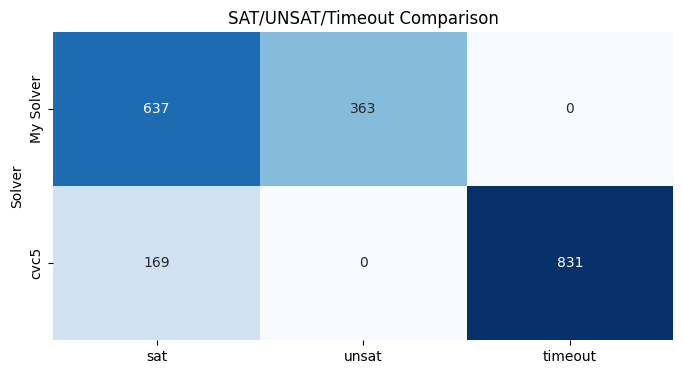

In [5]:
# Second run

# Merging 2 datframes to compare and make analysis



resulting_df = pd.merge(df, df_orig, on='Test name')

# # Droping values calculaed from CVC5, because they are not calculated
# resulting_df = resulting_df.drop('Values_y', axis=1)

# # Values calculated by my solver could be used later for verification
resulting_df = resulting_df.rename(columns={' Values': 'Values my solver'})
resulting_df = resulting_df.rename(columns={' Result': 'Result my solver'})
resulting_df = resulting_df.rename(columns={'Execution time Leonid': 'Execution time my solver'})
resulting_df = resulting_df.rename(columns={'Result CVC5': 'Result CVC'})
resulting_df = resulting_df.rename(columns={'Execution time CVC5': 'Execution time CVC'})

# count the number of rows where the "Result Leonid" column and the "Result CVC5" column have the same value
resulting_df['Result my solver'] = resulting_df['Result my solver'].str.strip().str.lower()

same_results_counter = sum(resulting_df['Result my solver'] == resulting_df['Result CVC'])
print("In total there are {} cases when the programs gave the same results".format(same_results_counter))


# Define the lambda function to calculate missing values
calculate_missing = lambda col: sum(1 for val in col if val == 'cvc5 interrupted by SIGTERM.')
sat_counter = lambda col: sum(1 for val in col if val == 'sat')

# # Apply the lambda function to column 'B'
missing_values_cvc = resulting_df['Result CVC'].pipe(calculate_missing)



sat_count_Leonid = sat_counter(resulting_df['Result my solver'])
sat_count_cvc = sat_counter(resulting_df['Result CVC'])

print("Number of 'sat' values in column: Result my solver: {}".format( sat_count_Leonid))
print("Number of 'sat' values in column: Result CVC5: {}".format(sat_count_cvc))

print("There are {} cvc5 interrupted by SIGTERM values in column Result CVC5.".format(missing_values_cvc))

resulting_df


resulting_df['Result my solver'] = resulting_df['Result my solver'].replace({'not sat': 'unsat'})
# tmp_second_run = plot_execution_times(resulting_df)


# tmp_second_run = stc_time_comparison(resulting_df, "STC")

second_run_sat = sat_unsat(resulting_df)

# resulting_df

The two solvers gave the same result for 16.90% of the tests.
On average, the original solver took 155.39 seconds and my solver took 19.58 seconds.
The median execution time for the original solver was 180.04 seconds and for my solver it was 15.43 seconds.

There are 468 cases when original cvc5 had a timeout, but my solver was able to find the result.
There are 169 cases when cvc solved the problem


C:\Users\Leonid\AppData\Local\Temp\ipykernel_1532\2867898614.py:67: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = small_df.to_latex(index=False)


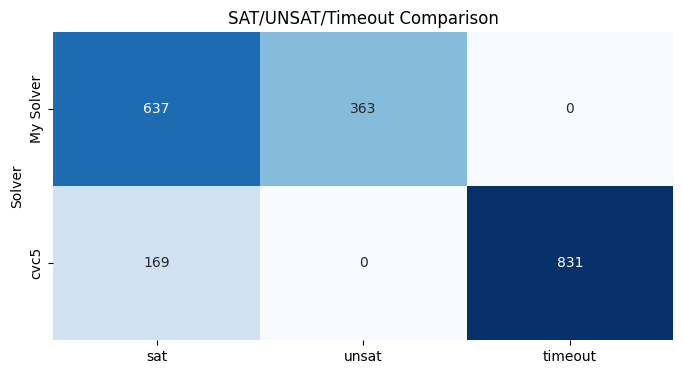

,Test name,Execution time my solver,Result my solver,Values,Execution time CVC,Result CVC,Result comparison
0,STC_0001.smt2,0.030689,sat,x = -300 y = 1 z = 300,21.429063,sat,Match
1,STC_0002.smt2,7.177578,sat,x = -161 y = -54 z = 163,0.260718,sat,Match
2,STC_0003.smt2,15.041955,sat,x = -5 y = 4 z = 4,0.232070,sat,Match
3,STC_0004.smt2,31.527554,unsat,NaN,180.027488,cvc5 interrupted by SIGTERM.,Mismatch
4,STC_0005.smt2,31.542761,unsat,NaN,180.032515,cvc5 interrupted by SIGTERM.,Mismatch
...,...,...,...,...,...,...,...
995,STC_0996.smt2,18.222798,sat,x = -7 y = 2 z = 11,180.025757,cvc5 interrupted by SIGTERM.,Mismatch
996,STC_0997.smt2,8.747455,sat,x = -153 y = 65 z = 149,180.026950,cvc5 interrupted by SIGTERM.,Mismatch
997,STC_0998.smt2,16.570406,sat,x = -9 y = -1 z = 12,180.026174,cvc5 interrupted by SIGTERM.,Mismatch
998,STC_0999.smt2,7.658770,sat,x = -168 y = 111 z = 150,99.801605,sat,Match


In [9]:
# Starting analysis of STC problems, timeout 3 min

# Third  Run, all STC test

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

original_cvc = pd.read_csv(".\\results_original_cvc5_time_out_3_min.csv")

original_cvc = original_cvc.rename(columns={'Result': 'Result CVC'})
original_cvc = original_cvc.rename(columns={'Execution time': 'Execution time CVC'})



my_solver =  pd.read_csv(".\\results_second_run_interval_300.csv")


# extract the test name and rename columns
my_solver['Test name'] = my_solver['Test name'].apply(lambda x: x.split('/')[-1])
my_solver = my_solver.rename(columns={' Execution time': 'Execution time my solver'})
my_solver = my_solver.rename(columns={' Result': 'Result my solver'})

my_solver['Result my solver'] = my_solver['Result my solver'].str.strip().str.lower()

# merge the two dataframes based on the 'Test name' column
merged_df = pd.merge(my_solver, original_cvc, on='Test name')


# process the results for each test and add a column to the merged dataframe
merged_df['Result comparison'] = merged_df.apply(process_result, axis=1)

same_results_counter = sum(merged_df['Result my solver'] == merged_df['Result CVC'])

# # create a bar chart of the result comparison for each test
# sns.countplot(x='Result comparison', data=merged_df)
# plt.title('Result Comparison')
# plt.show()


# Result consistency
same_results_counter = sum(merged_df['Result my solver'] == merged_df['Result CVC'])
total_tests = merged_df.shape[0]
result_consistency = same_results_counter / total_tests
print("The two solvers gave the same result for {:.2f}% of the tests.".format(result_consistency * 100))


# Performance comparison
avg_cvc_time = merged_df['Execution time CVC'].mean()
median_cvc_time = merged_df['Execution time CVC'].median()
avg_my_solver_time = merged_df['Execution time my solver'].mean()
median_my_solver_time = merged_df['Execution time my solver'].median()

print("On average, the original solver took {:.2f} seconds and my solver took {:.2f} seconds.".format(avg_cvc_time, avg_my_solver_time))
print("The median execution time for the original solver was {:.2f} seconds and for my solver it was {:.2f} seconds.".format(median_cvc_time, median_my_solver_time))


df_head = merged_df.head(5)

df_tail = merged_df.tail(5)

# concatenate the dataframes vertically
small_df = pd.concat([df_head, df_tail])

# convert the concatenated dataframe to latex
latex = small_df.to_latex(index=False)


# print(latex)

timeout_val = 0
for index, row in merged_df.iterrows():
    if row['Result CVC'] == 'cvc5 interrupted by SIGTERM.' and not pd.isna(row[' Values']):
        timeout_val += 1

print("")
print(f"There are {timeout_val} cases when original cvc5 had a timeout, but my solver was able to find the result.")

sat_counter = lambda col: sum(1 for val in col if val == 'sat')
sat_count_cvc = sat_counter(merged_df['Result CVC'])

print(f"There are {sat_count_cvc} cases when cvc solved the problem")



merged_df['Result my solver'] = merged_df['Result my solver'].replace({'not sat': 'unsat'})



# res = plot_execution_times(merged_df)


# res_2 = stc_time_comparison(merged_df, "STC")


summary_3_min = sat_unsat(merged_df)


merged_df





There are 8 same results


C:\Users\Leonid\AppData\Local\Temp\ipykernel_7064\2830268334.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = small_df.to_latex(index=False)


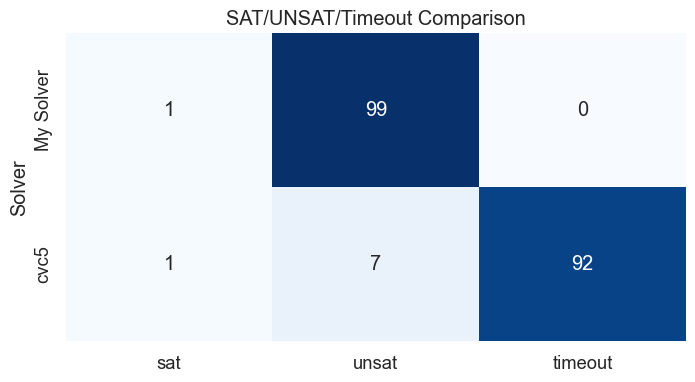

In [128]:
# Starting analysis of other math problems, timeout 3 min

# Fourth run, other math all

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

original_cvc = pd.read_csv(".\\results_original_cvc5_time_out_3_other_math.csv")

original_cvc = original_cvc.rename(columns={'Result': 'Result CVC'})
original_cvc = original_cvc.rename(columns={'Execution time': 'Execution time CVC'})



my_solver =  pd.read_csv(".\\other_math_time_out_3_min.csv")


# extract the test name and rename columns
my_solver['Test name'] = my_solver['Test name'].apply(lambda x: x.split('/')[-1])
my_solver = my_solver.rename(columns={' Execution time': 'Execution time my solver'})
my_solver = my_solver.rename(columns={' Result': 'Result my solver'})

my_solver['Result my solver'] = my_solver['Result my solver'].str.strip().str.lower()

# merge the two dataframes based on the 'Test name' column
merged_df_last = pd.merge(my_solver, original_cvc, on='Test name')


merged_df_last['Result my solver'] = merged_df_last['Result my solver'].replace({'not sat': 'unsat'})

same_results_counter = sum(merged_df_last['Result my solver'] == merged_df_last['Result CVC'])

# process the results for each test and add a column to the merged dataframe
merged_df_last['Result comparison'] = merged_df_last.apply(process_result, axis=1)

print(f"There are {same_results_counter} same results")
# merged_df


df_head = merged_df_last.head(5)

df_tail = merged_df_last.tail(5)

# concatenate the dataframes vertically
small_df = pd.concat([df_head, df_tail])

# convert the concatenated dataframe to latex
latex = small_df.to_latex(index=False)


# print(latex)

merged_df_last


# other_math = plot_execution_times(merged_df_last)



# other_math = stc_time_comparison(merged_df_last, "Other math")

other_math_sumary = sat_unsat(merged_df_last)

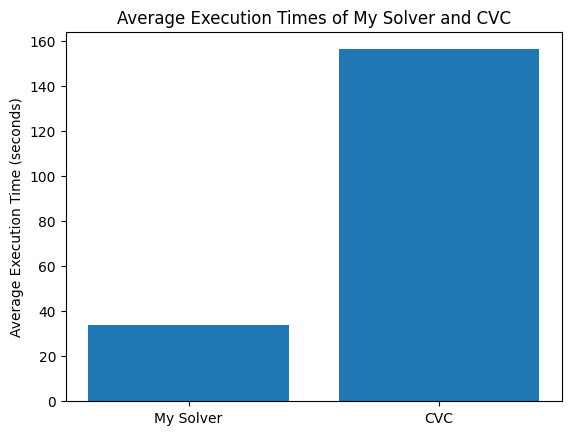

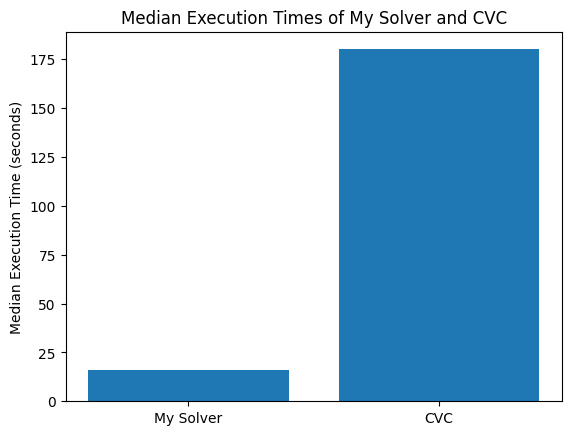

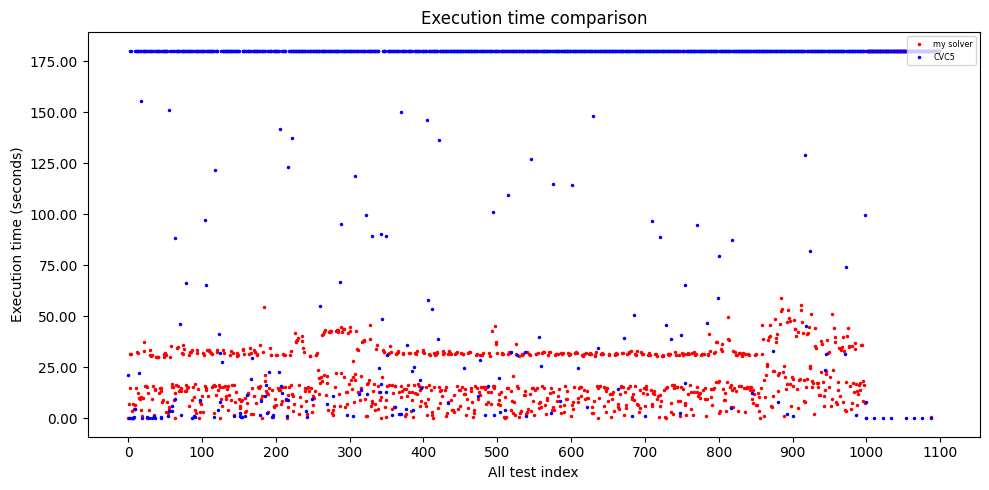

In [72]:
all_tests  =  pd.concat([merged_df, merged_df_last], ignore_index=True)


# all_tests

res_all_test = plot_execution_times(all_tests)



res_all_test = stc_time_comparison(all_tests, "All")


# TODO finish plots with all tests

In [17]:
# Aprove tests


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


approve_tests_cvc5 = pd.read_csv("AProVE_results_original_cvc5_time_out_3_min.csv")
approve_tests_my_solver =  pd.read_csv("AProVE_time_out_3_min.csv")


approve_tests_cvc5 = approve_tests_cvc5.rename(columns={'Result': 'Result CVC'})
approve_tests_cvc5 = approve_tests_cvc5.rename(columns={'Execution time': 'Execution time CVC'})




# # extract the test name and rename columns
approve_tests_my_solver['Test name'] = approve_tests_my_solver['Test name'].apply(lambda x: x.split('/')[-1])
approve_tests_my_solver = approve_tests_my_solver.rename(columns={' Execution time': 'Execution time my solver'})
approve_tests_my_solver = approve_tests_my_solver.rename(columns={' Result': 'Result my solver'})


approve_tests_my_solver['Result my approve_tests_my_solver'] = approve_tests_my_solver['Result my solver'].str.strip().str.lower()


# merge the two dataframes based on the 'Test name' column
merged_df = pd.merge(approve_tests_cvc5, approve_tests_my_solver, on='Test name')


# result = sat_unsat(merged_df, 'Result my approve_tests_my_solver')


# res_all_test = plot_execution_times(merged_df)



# res_all_test = stc_time_comparison(merged_df, "All")




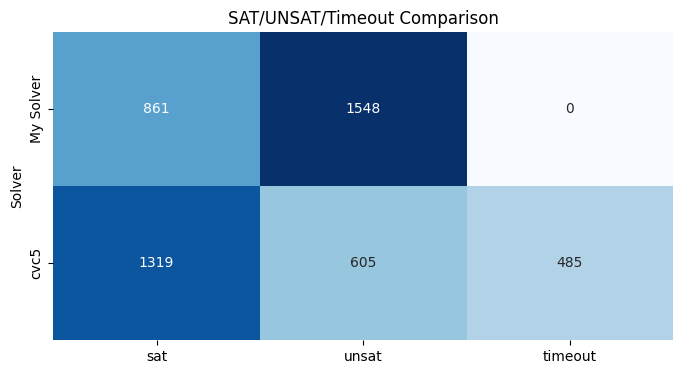

In [52]:
# Aprove tests


import pandas as pd

# renaims the same
approve_tests_cvc5 = pd.read_csv("AProVE_results_original_cvc5_time_out_3_min.csv")


part_0 = pd.read_csv("AProVE_modified_time_out_3_min_part_0.csv")
part_1 = pd.read_csv("AProVE_modified_time_out_3_min_part_1.csv")
part_2 = pd.read_csv("AProVE_modified_time_out_3_min_part_2.csv")
part_3 = pd.read_csv("AProVE_modified_time_out_3_min_part_3.csv")


approve_tests_my_solver = pd.concat([part_0, part_1, part_2, part_3], ignore_index=True)


approve_tests_cvc5 = approve_tests_cvc5.rename(columns={'Result': 'Result CVC'})
approve_tests_cvc5 = approve_tests_cvc5.rename(columns={'Execution time': 'Execution time CVC'})


# extract the test name and rename columns
approve_tests_my_solver['Test name'] = approve_tests_my_solver['Test name'].apply(lambda x: x.split('/')[-1])

# # merge the two dataframes based on the 'Test name' column
merged_df = pd.merge(approve_tests_cvc5, approve_tests_my_solver, on='Test name')

merged_df = merged_df.rename(columns={' Execution time': 'Execution time my solver'})


merged_df = merged_df.rename(columns={' Result': 'Result my approve_tests_my_solver'})


merged_df['Result my approve_tests_my_solver'] = merged_df['Result my approve_tests_my_solver'].replace({' SAT': 'sat'})
merged_df['Result my approve_tests_my_solver'] = merged_df['Result my approve_tests_my_solver'].replace({' Not SAT': 'not sat'})

merged_df['Execution time CVC'] = merged_df['Execution time CVC'].replace({'unsat	': 'not sat'})

merged_df



result = sat_unsat(merged_df, 'Result my approve_tests_my_solver')


# res_all_test = plot_execution_times(merged_df)



# res_all_test = stc_time_comparison(merged_df, "All")

